In [ ]:
#Import all necessary packages

import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
# from sklearn.externals import pickle,json
import pickle,json
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.animation as  animation 
import imageio
import os 
# import cv2
from PIL import Image
import squarify
%matplotlib inline

In [22]:
#Check the path to the directory where you are currently in
%pwd

'/Users/melody/Desktop/repos/5002/project'

In [23]:
my_path = '/Users/melody/Desktop/repos/5002/project'

In [24]:
!ls

5002project1104                       knn_model
5002project1104的副本                 rotten_tomatoes_movies.csv
Data Analyse Sourse Code-Splash.ipynb ~$Splash.pptx
Splash.pptx


In [25]:
my_df = pd.read_csv(f'{my_path}/rotten_tomatoes_movies.csv',
                    low_memory = False)
print(my_df.shape)
my_df.head(3)

(17712, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


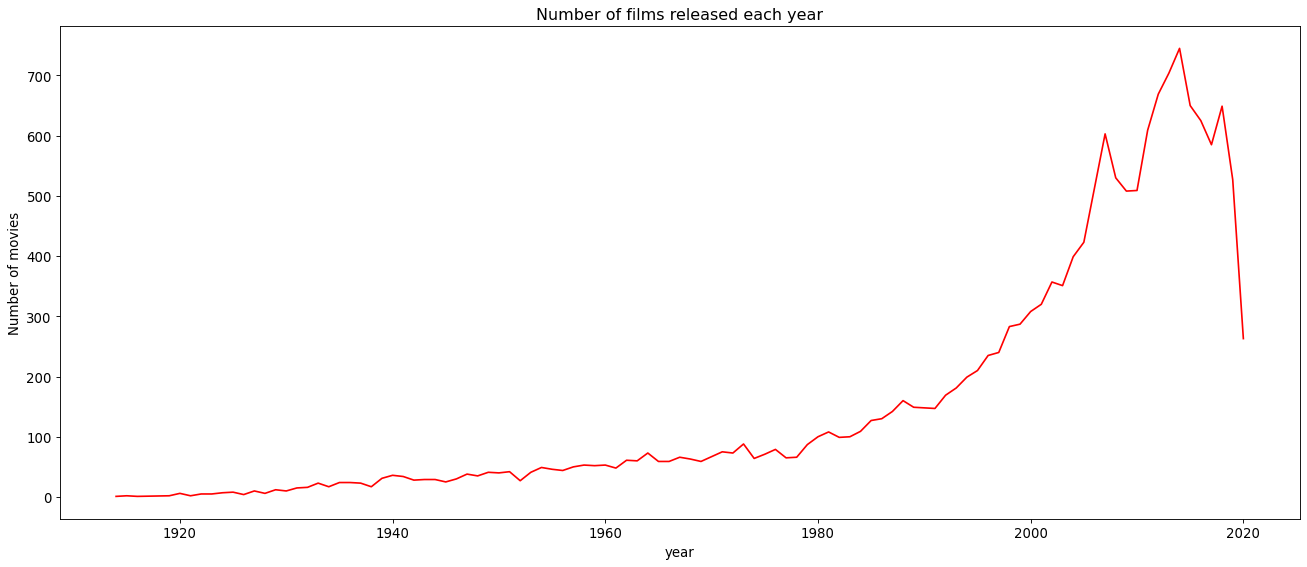

In [26]:
#extract year：draw plot of "Number of films released each year"
my_df['Date'] = pd.to_datetime(my_df['original_release_date'], errors='coerce')
my_df['time'] = my_df['Date'].dt.year

movie_year = my_df.groupby('time')['movie_title'].count()
plt.figure(figsize=(20,8),dpi = 80)
x = movie_year.index.tolist()
y = movie_year
plt.plot(x,y,color = 'r')
plt.xlabel('year')
plt.ylabel('Number of movies')
plt.title('Number of films released each year')
plt.show()



In [27]:
movie_type = my_df['genres'].str.split(',')
movie_type = movie_type.apply(pd.Series)
movie_type = movie_type.apply(pd.value_counts)
movie_type.unstack()

movie_type = movie_type.unstack().dropna().reset_index()
movie_type.columns=['level_0','movie_type','count']
movie_type.head(5)

,level_0,movie_type,count
0,0,Action & Adventure,3551.0
1,0,Animation,379.0
2,0,Art House & International,2021.0
3,0,Classics,1110.0
4,0,Comedy,3725.0


In [28]:
movie_type.colums = ['level_0','movie_type','counts']
movie_type_m = movie_type.drop(['level_0'],axis = 1).groupby('movie_type').sum().sort_values(by=['count'],ascending=1)
movie_type_m.head(5)

/var/folders/jc/tf67_fr517b0r5nng1m1d2fm0000gn/T/ipykernel_25369/3029816090.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  movie_type.colums = ['level_0','movie_type','counts']


,count
movie_type,
Television,1.0
Special Interest,3.0
Western,9.0
Romance,14.0
Anime & Manga,19.0


In [29]:
# count = movie_type_m.iloc[:,0]
# print(count)
# # print(movie_type_m["count"])
# # size = []

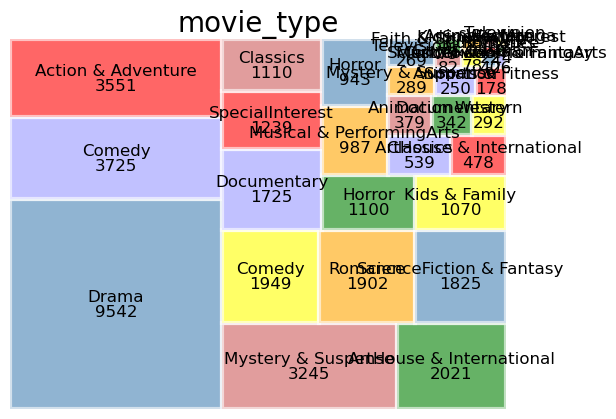

In [30]:
import squarify
size=[9542,3725,3551,3245,2021,1949,1902,1825,1725,1239,1110,1100,1070,987,943,539,478,379,342,292,289,269,250,178,82,79,78,46,40,26,22,19,14,9,3,1]
name=['Drama','Comedy','Action & Adventure','Mystery & Suspense','ArtHouse & International','Comedy','Romance','ScienceFiction & Fantasy','Documentary','SpecialInterest','Classics','Horror','Kids & Family','Musical & PerformingArts','Horror','Classics','ArtHouse & International','Animation','Documentary','Western','Mystery & Suspense','Television','Animation','Sports & Fitness','CultMovies','Faith & Spirituality','Gay & Lesbian','Kids & Family','ScienceFiction & Fantasy','Musical & PerformingArts','CultMovies','Anime & Manga','Romance','Western','SpecialInterest','Television']
colors = ["steelblue", "#9999ff","red","indianred","green","yellow","orange"]
plot = squarify.plot(
    sizes=size, #give plot size
    color = colors,# give plot color
    label=name,# give plot label
    value=size,#give plot value
    alpha= 0.6,# give plot transparency
    edgecolor = "white",#set edge color
    linewidth =3 #set edge width
)
plt.rc('font',size=12)
# set title size
plot.set_title("movie_type",fontdict = {'fontsize':20})
# remove axis
plt.axis('off')
# remove scale
plt.tick_params(top = 'off', right='off')

plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk

In [2]:
%pwd

'/Users/melody/Desktop/repos/5002/project'

In [3]:
my_path = '/Users/melody/Desktop/repos/5002/project'

In [4]:
data = pd.read_csv(f'{my_path}/rotten_tomatoes_critic_reviews.csv',
                    low_memory = False)
print(data.shape)
data.head(3)

(1130017, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...


In [5]:
nltk. download('stopwords')
stemmer = nltk. SnowballStemmer ("english")# Stemming

from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
                             
def clean(text) :
    text = str(text).lower () 
    #Substitution of special symbol
    text = re.sub("\[.*?\]",'',text)
    text = re.sub('https?://IS+ www.|S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re. sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re. sub('/n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review_content"]= data["review_content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melody/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#calculate emotional score

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review_content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review_content"]]
data["Netural"] = [sentiments.polarity_scores(i)["neu"] for i in data["review_content"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/melody/nltk_data...


In [7]:
data = data[["review_content","Positive","Negative","Netural"]]
print(data.head())

                                      review_content  Positive  Negative  \
0  fantasi adventur fuse greek mytholog contempor...     0.128     0.000   
1  uma thurman medusa gorgon coiffur writh snake ...     0.156     0.000   
2  topnotch cast dazzl special effect tide teen n...     0.213     0.000   
3  whether audienc get behind lightn thief hard p...     0.212     0.182   
4  what realli lack lightn thief genuin sens wond...     0.000     0.341   

   Netural  
0    0.872  
1    0.844  
2    0.787  
3    0.606  
4    0.659  


In [ ]:
# Analyse the emotional tendency of comment content

In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Netural"])

def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("🤩")#positive
    elif (b>a) and (b>c):
        print("😡")#negative
    else:
        print("😶")#netural
sentiment_score(x,y,z)

😶


In [9]:
print("Positive",x)
print("Negative",y)
print("Netural",z)


Positive 188735.11000001317
Negative 99007.27199999738
Netural 842153.9369996601
